# Используется материал бесплатного курса [mlcource.ai](https://mlcourse.ai/book/topic01/topic01_pandas_data_analysis.html)

## Импорт библиотек

In [23]:
import numpy as np
import pandas as pd
pd.set_option('display.precision',2)

## Загрузка датасета

In [24]:
# для Jupyter-book мы копируем данные с GitHub. Локально, чтобы сэкономить интернет-трафик,
# вы можете указать папку data/ в корне вашего клонированного
# репозитория https://github.com/Yorko/mlcourse.ai
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
df = pd.read_csv(DATA_URL + "telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


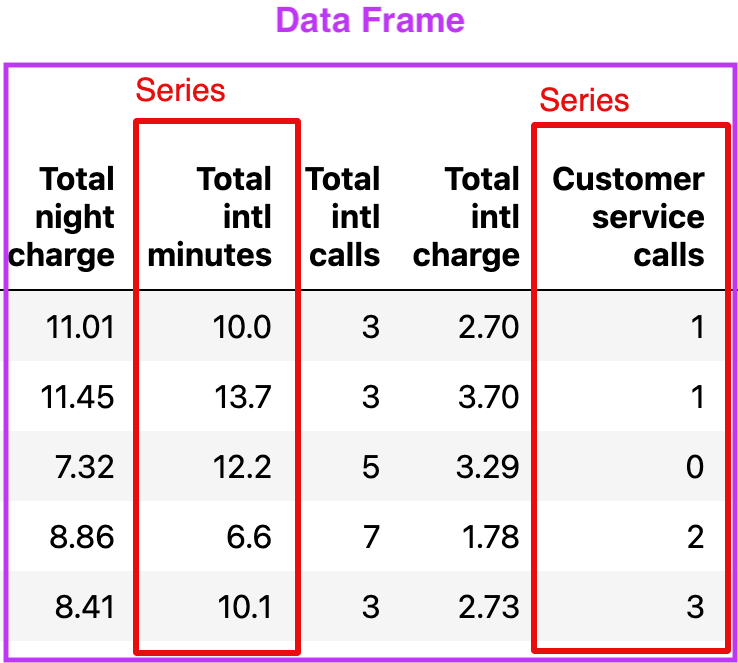

## Размерность датасета

In [25]:
print(df.shape)

(3333, 20)


In [26]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


## Информация о датасете, типах данных в нём. Изменение типа данных.

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [28]:
df["Churn"] = df["Churn"].astype("int64")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Метод describe показывает основные статистические характеристики каждого числового признака (типы int64 и float64): количество значений, не являющихся пропущенными, среднее значение, стандартное отклонение, диапазон, медиана, квартили 0,25 и 0,75.

In [29]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


Чтобы просмотреть статистику по нечисловым признакам, необходимо явно указать интересующие типы данных в параметре include.

In [30]:
df.describe(include=['object','bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


Для категориальных (тип object) и логических (тип bool) признаков мы можем использовать метод value_counts . Давайте посмотрим на распределение Churn:

In [31]:
df["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

чтобы посмотреть в процентах используем normalize

In [32]:
df["Churn"].value_counts(normalize=True)

Churn
0    0.86
1    0.14
Name: proportion, dtype: float64

## Сортировка

DataFrame Можно отсортировать по значению одной из переменных (т. е. столбцов). Например, мы можем отсортировать по общей дневной стоимости (используйте ascending=False для сортировки в порядке убывания):

In [33]:
df.sort_values(by="Total day charge",ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


Мы также можем сортировать по нескольким столбцам:

In [34]:
df.sort_values(by=["Churn","Total day charge"],ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


## Индексирование и извлечение данных

Чтобы получить один столбец, можно использовать конструкцию DataFrame['Name']. Давайте воспользуемся этим, чтобы ответить на вопрос только об этом столбце: какова доля ушедших пользователей в нашем фрейме данных?

In [35]:
df['Churn'].mean()

np.float64(0.14491449144914492)

14,5% — это довольно плохой показатель для компании; такой уровень оттока клиентов может привести к банкротству.

Логическая индексация с использованием одного столбца также очень удобна. Синтаксис: df[P(df['Name'])], где P — это некоторое логическое условие, которое проверяется для каждого элемента столбца Name. Результатом такой индексации является DataFrame список, состоящий только из строк, удовлетворяющих условию P в столбце Name.

In [36]:
df.select_dtypes(include=np.number)[df["Churn"] == 1].mean()

Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

Сколько времени (в среднем) ушедшие пользователи проводят в телефоне в дневное время?

In [37]:
df[df["Churn"] == 1]['Total day minutes'].mean()

np.float64(206.91407867494823)

Какова максимальная продолжительность международных звонков среди постоянных пользователей (Churn == 0), у которых нет международного тарифного плана?

In [38]:
df[(df["Churn"] == 0) & (df['International plan']=='No')]['Total intl minutes'].max()

np.float64(18.9)

DataFrames можно индексировать по имени столбца (метке), имени строки (индексу) или по порядковому номеру строки. Метод loc используется для индексирования по имени, а iloc() — для индексирования по номеру.

In [39]:
df.loc[0:5,'State':'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [40]:
df.iloc[0:5,0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


В первом случае ниже мы говорим: «выведите нам значения строк с индексами от 0 до 5 (включительно) и столбцов с названиями от State до Area code (включительно)». Во втором случае мы говорим: «выведите нам значения первых пяти строк в первых трёх столбцах» (как в типичном срезе Python: максимальное значение не включается).

## Применение функций к ячейкам, столбцам, строкам

Чтобы применить функции к каждому столбцу, используйте apply():

In [41]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

In [42]:
df[df['State'].apply(lambda state: state[0]=='W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


## Замена значений в Dataset

Метод map можно использовать для замены значений в столбце, передав в качестве аргумента словарь в формате {old_value: new_value}:

In [43]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Почти то же самое можно сделать с помощью метода replace. Но, если значение отсутсвует в словаре сопоставления - будет предупреждение. 

In [44]:
df = df.replace({"Voice mail plan": d})
df.head()

C:\Users\ilyav\AppData\Local\Temp\ipykernel_16160\1212166602.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Voice mail plan": d})


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Группировка

df.groupby(by=группирующие_столбцы)[столбцы_для_отображения].функция()

In [45]:
colums_to_show = ["Total day minutes","Total eve minutes","Total night minutes"]

df.groupby(["Churn"])[colums_to_show].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

In [46]:
colums_to_show = ["Total day minutes","Total eve minutes","Total night minutes"]

df.groupby(["Churn"])[colums_to_show].agg(['mean','std','min','max'])

Total day minutes                    Total eve minutes               \
                   mean    std  min    max              mean    std   min   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
         max                mean    std   min    max  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9

## Сводные таблицы

Предположим, мы хотим посмотреть, как распределяются наблюдения в нашем наборе данных в контексте двух переменных — Churn и International plan. Для этого мы можем построить таблицу сопряжённости с помощью метода crosstab.

In [47]:
pd.crosstab(df["Churn"], df["International plan"], normalize=True)

International plan,False,True
Churn,,
0,0.8,0.06
1,0.1,0.04


In [48]:
pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.60,0.25
1,0.12,0.02


Для тех, кто знаком с Excel, это будет похоже на сводные таблицы. И, конечно, сводные таблицы реализованы в Pandas: метод pivot_table принимает следующие параметры:

* values — список переменных для расчёта статистики,

* index – список переменных для группировки данных,

* aggfunc — какие статистические данные нам нужно рассчитать для групп, например, сумму, среднее значение, максимум, минимум или что-то ещё.

Давайте посмотрим на среднее количество дневных, вечерних и ночных звонков по коду городов:

In [49]:
df.pivot_table(["Total day calls","Total eve calls","Total night calls"],["Area code"],aggfunc="mean",)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


## Преобразование датафрейма

Как и многие другие операции в Pandas, добавление столбцов в DataFrame может осуществляться разными способами.

Например, если мы хотим подсчитать общее количество звонков для всех пользователей, создадим серию total_calls и вставим её в DataFrame:

In [50]:
df["Total charge"] = (
    df['Total day charge']
    +df['Total eve charge']
    +df['Total intl charge']
    +df['Total night charge'])
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


Чтобы удалить столбцы или строки, используйте метод drop, передав необходимые индексы и параметр axis (1 при удалении столбцов и ничего или 0 при удалении строк). Аргумент inplace указывает, нужно ли изменять исходный DataFrame. При inplace=False метод drop не изменяет существующий DataFrame и возвращает новый с удалёнными строками или столбцами. При inplace=True он изменяет DataFrame.

In [51]:
# избавьтесь от только что созданных столбцов
df.drop(["Total charge"], axis=1, inplace=True)
# а вот как можно удалить строки
df.drop([1, 2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## Первая попытка прогнозирования оттока клиентов в сфере телекоммуникаций

Давайте посмотрим, как показатель оттока клиентов связан с функцией международного плана. Мы сделаем это с помощью crosstab таблицы непредвиденных обстоятельств, а также с помощью визуального анализа с Seaborn (однако визуальный анализ будет более подробно рассмотрен в следующей теме).

In [52]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [53]:
# some imports to set up plotting
import matplotlib.pyplot as plt

# !pip install seaborn
import seaborn as sns

# import some nice vis settings
sns.set()
# Graphics in the Retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

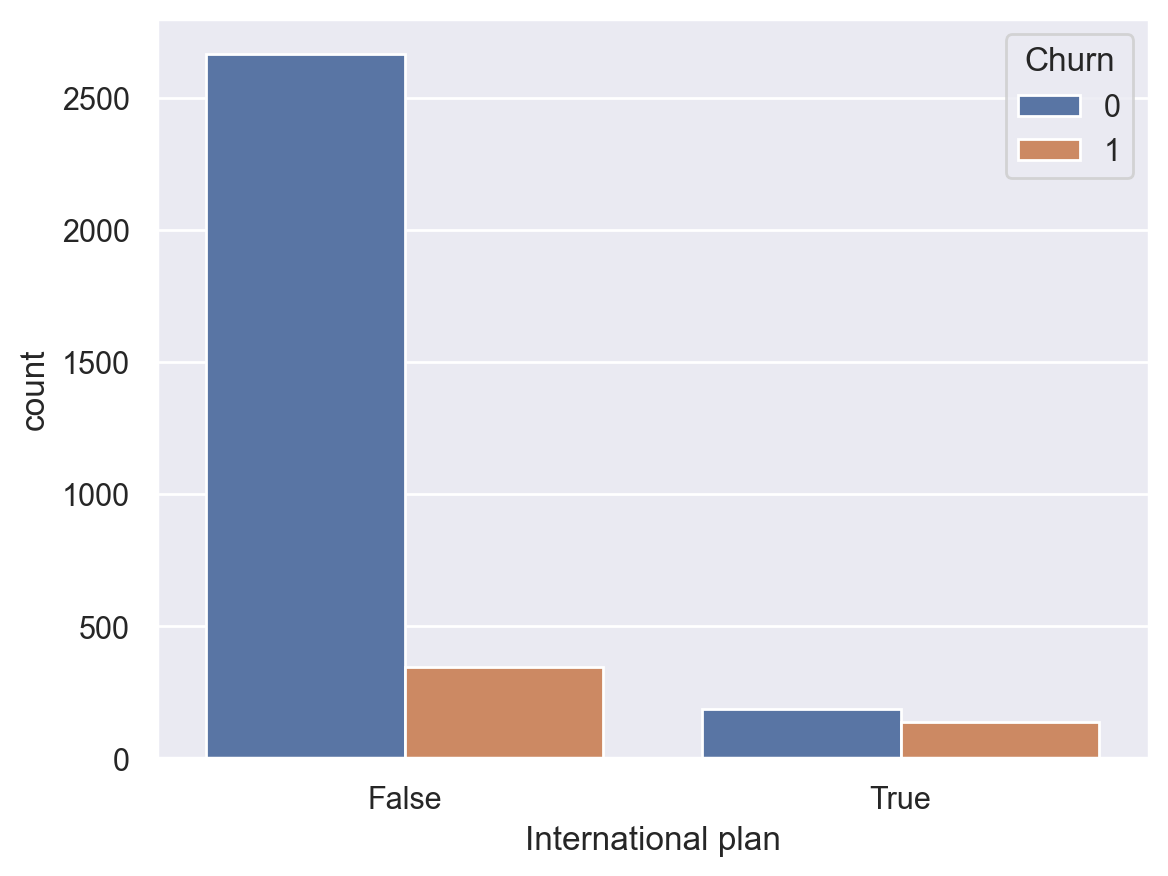

In [54]:
import seaborn as sns
sns.countplot(x="International plan", hue="Churn", data=df);

Мы заметили, что уровень оттока клиентов значительно выше в случае с международным тарифом. Это примечательный факт. Возможно, высокие и плохо контролируемые расходы на международные звонки приводят к конфликтам и недовольству клиентов оператора связи.

Далее давайте рассмотрим ещё одну важную функцию — звонки в службу поддержки. Давайте также составим сводную таблицу и рисунок.

In [55]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


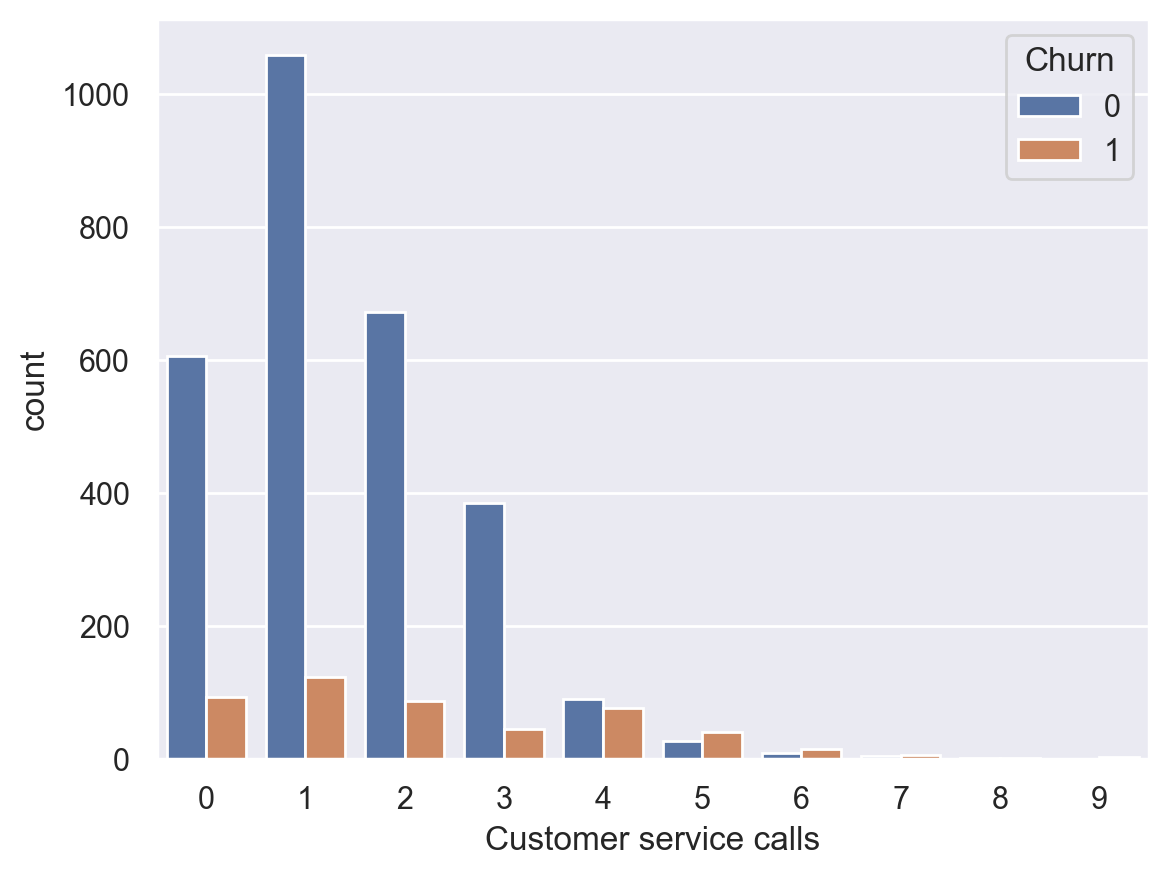

In [56]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

Хотя это не так очевидно из сводной таблицы, на приведённом выше графике легко заметить, что коэффициент оттока резко возрастает после 4 обращений в службу поддержки и выше.

Теперь давайте добавим в наш DataFrame бинарный признак — Customer service calls > 3. И снова посмотрим, как он связан с оттоком клиентов.

In [57]:
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


<Axes: xlabel='Many_service_calls', ylabel='count'>

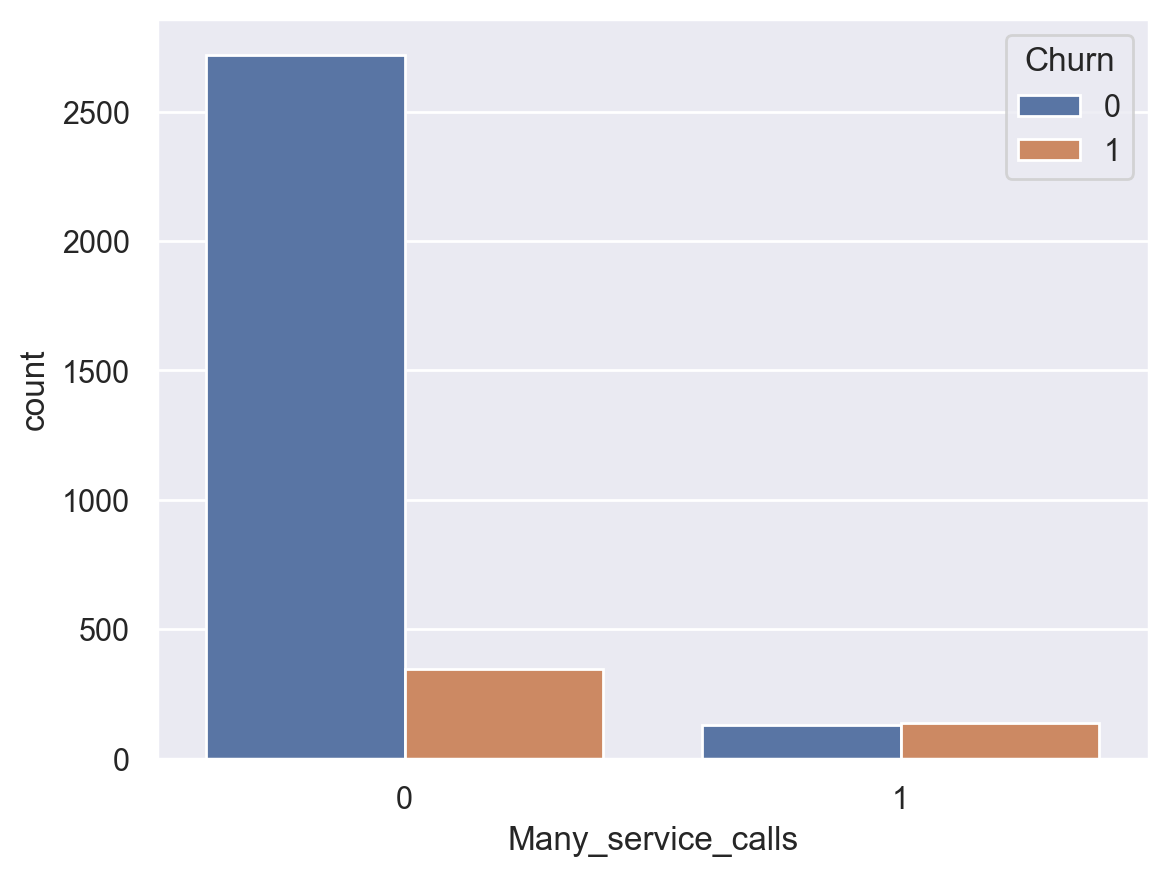

In [58]:
sns.countplot(x="Many_service_calls", hue="Churn", data=df)

Давайте создадим ещё одну таблицу непредвиденных обстоятельств, которая будет связывать отток как с международным планом, так и с недавно созданной функцией Many_service_calls.

In [59]:
pd.crosstab(df["Many_service_calls"] & df["International plan"], df["Churn"], margins=True)

Churn,0,1,All
row_0,,,
False,2841,464,3305
True,9,19,28
All,2850,483,3333


Таким образом, прогнозируя, что клиент не останется лояльным (Отток= 1), если он совершил более 3 звонков в сервисный центр И добавил Международный тарифный план, и прогнозируя Отток=0 в противном случае (и “в противном случае” здесь означает отрицание, т.е. Many_service_calls <= 3 ИЛИ Международный план не добавляется), мы ожидаем точность в 85,8% (мы ошибемся только 464 + 9 раз, посмотрите на таблицу непредвиденных обстоятельств выше; и 
 
). Точность в 85,8 %, достигнутая с помощью таких простых рассуждений, служит полезной отправной точкой (базовой) для разработки будущих моделей машинного обучения.

По мере прохождения курса помните, что до появления машинного обучения процесс анализа данных выглядел примерно так. Давайте вспомним, что мы уже изучили:

Доля лояльных клиентов в наборе данных составляет 85,5%. Самая наивная модель, которая всегда предсказывает «лояльного клиента» на основе таких данных, будет угадывать правильно примерно в 85,5% случаев. То есть доля правильных ответов (точность) последующих моделей должна быть не меньше этого числа и, будем надеяться, значительно выше;

С помощью простого прогноза, который можно выразить следующей формулой: International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0, мы можем рассчитывать на точность угадывания в 85,8 %, что чуть выше 85,5 %. Далее мы поговорим о деревьях решений и выясним, как находить такие правила автоматически, основываясь только на входных данных;

Мы получили эти два базовых показателя без применения машинного обучения, и они послужат отправной точкой для наших последующих моделей. Если окажется, что, приложив огромные усилия, мы повысим точность всего на 0,5%, то, возможно, мы что-то делаем не так и достаточно ограничиться простой моделью «если-то» с двумя условиями;

Прежде чем обучать сложные модели, рекомендуется немного обработать данные, построить графики и проверить простые предположения. Более того, в бизнес-приложениях, использующих машинное обучение, обычно начинают с простых решений, а затем экспериментируют с более сложными.